In [2]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Definindo stilo
sns.set_style('darkgrid')

# Importando dados do GitHub 
url = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(url, sep = ',')

## Verificando base de dados

In [4]:
dados.head().style.background_gradient(cmap = 'viridis')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.000000,Redenção,15.000000,PA,3,0,1,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.000000,509.000000,514.000000,517.000000,435.600000,512.300000,488.600000,432.400000,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABBADEA,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCCAECB,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.000000,60.000000,100.000000,80.000000,80.000000,100.000000,420.000000,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.000000,Marabá,15.000000,PA,1,3,1,1.000000,0,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,nan,508.000000,512.000000,nan,nan,409.300000,375.300000,nan,nan,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEABDCC,nan,1,nan,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECAAECD,nan,1.000000,80.000000,100.000000,80.000000,80.000000,60.000000,400.000000,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.000000,Belém,15.000000,PA,1,12,1,1.000000,0,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.000000,508.000000,512.000000,515.000000,423.200000,499.100000,441.000000,427.200000,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDDBDBA,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBA

## Desafios Aula 02

MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [5]:
# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos
# dados.query('NU_IDADE == 13 | NU_IDADE == 14')
mega_desafio = dados[(dados["NU_IDADE"] == 13) | (dados["NU_IDADE"] == 14)]
mega_desafio

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
310,190001016485,2019,1501402,Belém,15,PA,14,F,1,1,...,A,A,A,B,B,A,C,A,A,A
2818,190001116721,2019,2202406,Capitão de Campos,22,PI,14,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3022,190001124999,2019,2100303,Aldeias Altas,21,MA,14,M,1,3,...,B,A,A,B,B,A,D,A,B,B
5748,190001229936,2019,2908408,Conceição do Coité,29,BA,14,F,1,0,...,A,A,A,B,A,A,C,A,A,A
8845,190001353348,2019,2600104,Afogados da Ingazeira,26,PE,14,F,1,3,...,B,A,A,B,B,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123574,190005947160,2019,5004502,Itaporã,50,MS,14,M,1,1,...,A,A,B,B,B,B,E,A,E,B
124683,190005993245,2019,3538808,Piraju,35,SP,14,F,1,1,...,B,B,B,B,B,B,E,A,B,B
125999,190006045655,2019,5300108,Brasília,53,DF,14,F,1,3,...,B,A,A,E,B,B,E,B,B,B
127008,190006099362,2019,3109105,Bueno Brandão,31,MG,14,F,1,1,...,A,A,A,B,A,A,C,A,A,B


In [6]:
p_mega_desafio = mega_desafio.SG_UF_RESIDENCIA.value_counts(normalize = True) * 100
p_mega_desafio

PE    12.413793
CE    10.344828
BA     9.655172
PA     8.275862
SP     7.586207
MG     7.586207
MA     6.206897
GO     4.827586
PB     4.827586
PI     4.827586
MT     2.758621
DF     2.758621
AM     2.758621
PR     2.068966
SE     2.068966
TO     2.068966
SC     1.379310
AL     1.379310
RO     1.379310
RS     0.689655
RJ     0.689655
MS     0.689655
AP     0.689655
AC     0.689655
RN     0.689655
ES     0.689655
Name: SG_UF_RESIDENCIA, dtype: float64

In [7]:
p_mega_desafio = p_mega_desafio.reset_index()

Text(0.5, 1.0, 'Alunos de 13 e 14 anos')

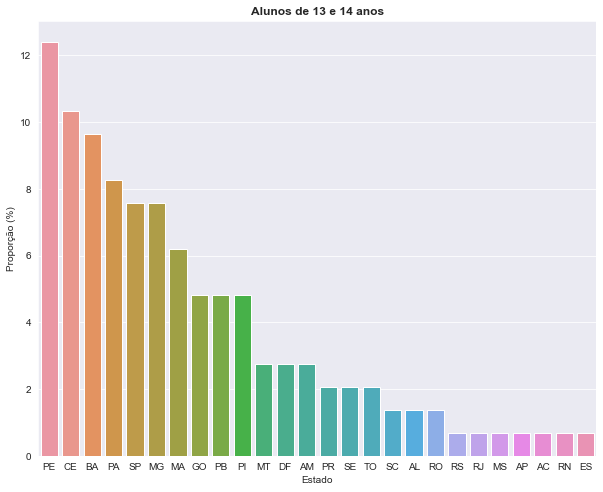

In [8]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'index', y = 'SG_UF_RESIDENCIA', data = p_mega_desafio)
plt.xlabel("Estado")
plt.ylabel("Proporção (%)")
plt.title("Alunos de 13 e 14 anos", fontweight = "bold")

In [9]:
# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.
gui_desafio = dados[dados["NU_IDADE"] < 18]
gui_desafio

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
8,190001004986,2019,1502400,Castanhal,15,PA,17,F,1,3,...,B,A,A,C,B,A,E,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127350,190006118551,2019,2611606,Recife,26,PE,16,M,1,1,...,B,A,B,E,B,B,E,B,B,B
127355,190006118808,2019,3131307,Ipatinga,31,MG,17,F,1,3,...,B,A,A,C,A,A,D,A,B,B
127361,190006119076,2019,4104303,Campo Mourão,41,PR,17,M,1,1,...,B,A,B,C,A,B,D,A,B,B
127371,190006119825,2019,2506103,Fagundes,25,PB,16,M,1,3,...,A,A,A,B,A,A,D,A,A,B


In [10]:
p_gui_desafio = gui_desafio['SG_UF_RESIDENCIA'].value_counts(normalize = True) * 100
p_gui_desafio

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

In [11]:
p_gui_desafio = p_gui_desafio.reset_index()

Text(0.5, 1.0, 'Alunos menores de 18 anos')

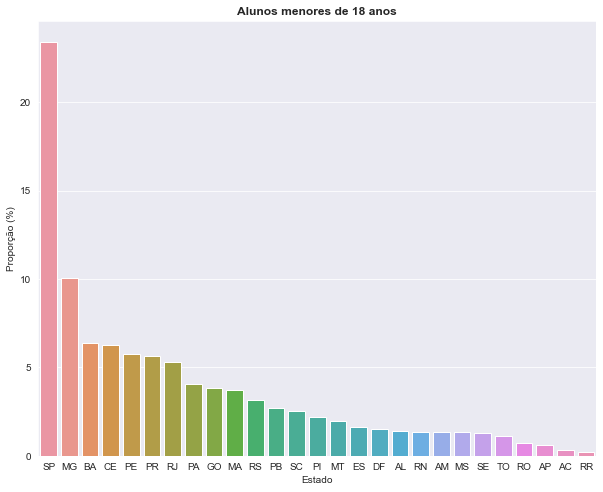

In [12]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'index', y = 'SG_UF_RESIDENCIA', data = p_gui_desafio)
plt.xlabel("Estado")
plt.ylabel("Proporção (%)")
plt.title("Alunos menores de 18 anos", fontweight = "bold")

In [13]:
# Desafio 3: Criar uma função para plotar o boxplot do seaborn
def sBoxplot(y, title, xl, yl):
    ordem = dados.Q006.unique()
    ordem.sort()

    plt.figure(figsize = (10, 8))
    sns.boxplot(x = 'Q006', y = y, data = dados, order = ordem, showfliers = False)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

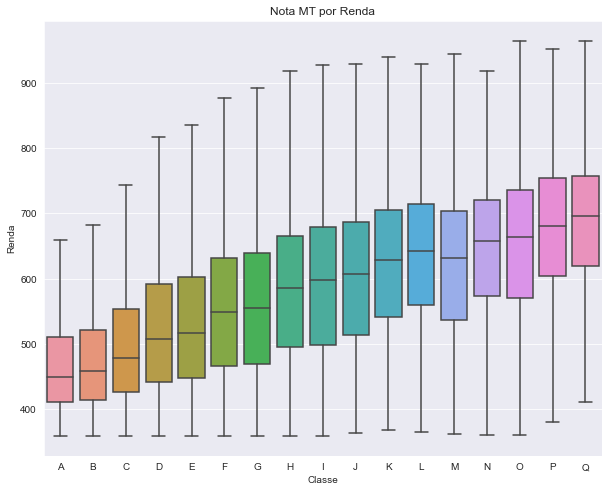

In [14]:
sBoxplot('NU_NOTA_MT', 'Nota MT por Renda', 'Classe', 'Renda')

In [15]:
# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
dados.query('NU_NOTA_CN == 0 ')['TP_PRESENCA_CN'].value_counts()

1    18
Name: TP_PRESENCA_CN, dtype: int64

18 PRESENTES ZEROU A PROVA

In [16]:
dados.query('NU_NOTA_CH == 0')['TP_PRESENCA_CH'].value_counts()

1    176
Name: TP_PRESENCA_CH, dtype: int64

176 PRESENTES ZEROU A PROVA

In [17]:
dados.query('NU_NOTA_MT == 0')['TP_PRESENCA_MT'].value_counts()

1    25
Name: TP_PRESENCA_MT, dtype: int64

25 PRESENTES ZEROU A PROVA

In [18]:
dados.query('NU_NOTA_LC == 0')['TP_PRESENCA_LC'].value_counts()

1    96
Name: TP_PRESENCA_LC, dtype: int64

96 PRESENTES ZEROU A RPOVA

In [19]:
# Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)
dados.query('TP_PRESENCA_CN == 2')['NU_NOTA_CN'].value_counts(dropna = False)

NaN    52
Name: NU_NOTA_CN, dtype: int64

In [20]:
dados.query('TP_PRESENCA_CH == 2')['NU_NOTA_CH'].value_counts(dropna = False)

NaN    126
Name: NU_NOTA_CH, dtype: int64

In [21]:
dados.query('TP_PRESENCA_MT == 2')['NU_NOTA_MT'].value_counts(dropna = False)

NaN    52
Name: NU_NOTA_MT, dtype: int64

In [22]:
dados.query('TP_PRESENCA_LC == 2')['NU_NOTA_LC'].value_counts(dropna = False)

NaN    126
Name: NU_NOTA_LC, dtype: int64

In [23]:
# Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

In [24]:
dados.query('IN_TREINEIRO == 0')['Q006'].value_counts(normalize = True).sort_index() * 100

A     4.683021
B    25.686066
C    26.814849
D    10.141187
E     9.462489
F     4.273123
G     5.777869
H     3.439038
I     2.535297
J     1.453844
K     1.018048
L     0.711741
M     0.696559
N     0.979648
O     0.837657
P     0.671554
Q     0.818011
Name: Q006, dtype: float64

In [25]:
dados.query('IN_TREINEIRO == 1')['Q006'].value_counts(normalize = True).sort_index() * 100

A     3.869879
B    19.654568
C    16.667749
D     7.785209
E     8.226739
F     5.551588
G     6.863191
H     6.265827
I     4.629570
J     3.058243
K     2.220635
L     1.993377
M     2.012856
N     2.830985
O     2.525810
P     2.467372
Q     3.376404
Name: Q006, dtype: float64

In [26]:
renda_normalizada = dados[['Q006', 'IN_TREINEIRO']].value_counts(normalize = True) * 100
renda_normalizada = renda_normalizada.reset_index()
renda_normalizada["IN_TREINEIRO"] = renda_normalizada["IN_TREINEIRO"].map({0: "Não", 1: "Sim"})

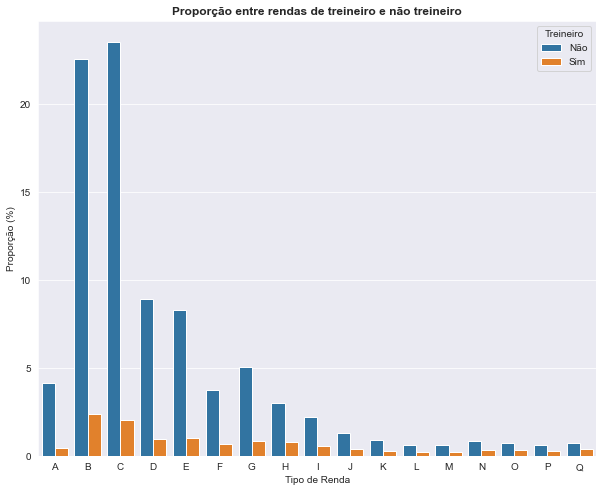

In [27]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Q006', y = 0, hue = 'IN_TREINEIRO', data = renda_normalizada, order = renda_ordenada)
plt.title('Proporção entre rendas de treineiro e não treineiro', fontweight = 'bold')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Renda')
plt.legend(title = 'Treineiro', ncol = 1, loc = 'upper right')

In [28]:
# Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.
dados['Q025'] = dados['Q025'].map({'A': 'Não', 'B': "Sim"})
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis = 1)
provas.append('NU_NOTA_TOTAL')

In [29]:
dados_sem_zero = dados.query('NU_NOTA_TOTAL != 0')

Text(0.5, 0, 'Possui Internet')

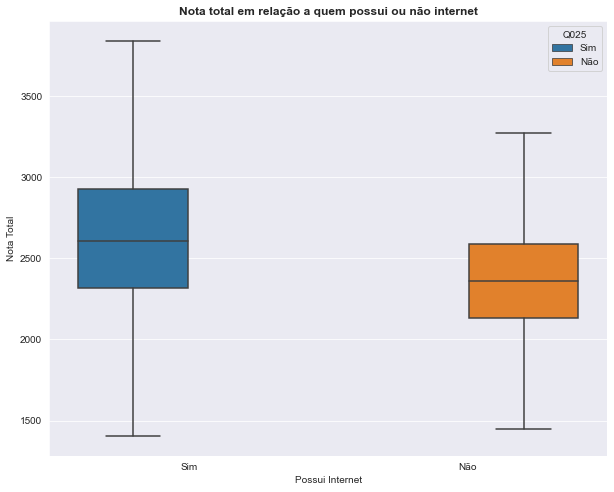

In [30]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Q025', y = "NU_NOTA_TOTAL", data = dados_sem_zero, hue = 'Q025', showfliers = False)
plt.title('Nota total em relação a quem possui ou não internet', fontweight = 'bold')
plt.ylabel('Nota Total')
plt.xlabel('Possui Internet')